<a href="https://colab.research.google.com/github/junegoo94/Open-Vocabulary-Models-Tutorials/blob/main/Grounded_DINO_tutorials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open-Vocabulary Object Detection with Grounding DINO Tutorial

[June Moh Goo](https://www.linkedin.com/in/jmgoo1118/) / PhD Student in Computer Vision for 3D Point Clouds

---
---


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/11t_YR5RrbFCcwwA7IHNI7Mr04JiV9pck)

In this tutorial, we will demonstrate open-vocabulary object detection using **Grounding DINO**, a state-of-the-art model that can detect objects described by arbitrary textual prompts. Similar to CLIP-based zero-shot classification, open-vocabulary detection allows you to query images for objects without predefined categories.

## Key Idea
### Grounding DINO
[![Paper](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/pdf/2303.05499) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO)

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

The key idea of Grounding DINO (DETR with Improved Non-autoregressive Optimization) is to enable open-vocabulary object detection by integrating language understanding directly into the object detection process. Grounding DINO builds upon DETR and enhances it to detect objects in an image based on free-form natural language queries, rather than being limited to a predefined set of object classes.

- Open-Vocabulary Object Detection: Grounding DINO uses text embeddings to represent object categories, allowing it to generalize to unseen classes by relying on textual descriptions rather than fixed class labels.
- Vision-Language Alignment: It leverages pre-trained vision-language models (like CLIP) to align object representations from images with textual queries in a shared embedding space.
- Transformer-Based Architecture: Grounding DINO inherits DETR’s transformer-based architecture for end-to-end object detection, using attention mechanisms to model relationships between objects in an image and queries.
- Improved Optimization: Grounding DINO introduces techniques like improved loss functions and training strategies to enhance the convergence and performance of DETR.

If given an image of a living room and the query "a green couch", Grounding DINO can identify and localise the green couch in the image, even if it wasn’t explicitly trained on the category "green couch." This is because it uses the semantic understanding of the language model to process the query and align it with the visual features in the image.

<!-- ### Segment-Anything Model (SAM)
[![Paper](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://ai.meta.com/research/publications/segment-anything/) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/facebookresearch/segment-anything)

![SAM figure](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbw6Ic3%2Fbtr8MpELXIl%2FTr53SgnD4qmsIE9UK7yOBK%2Fimg.png)

The key idea of Segment Anything Model (SAM) is to provide a general-purpose, promptable segmentation model capable of segmenting objects in any image with minimal user input. SAM is designed to handle a wide range of segmentation tasks by leveraging a flexible prompt interface (e.g., points, boxes, or text) and a powerful vision foundation model.

- Promptable Segmentation: SAM can segment objects in an image based on diverse user inputs, including points (e.g., a click on the object), bounding boxes, or textual descriptions. This flexibility allows it to adapt to various use cases.
- Generalization: SAM is pre-trained on a massive dataset of images and masks, enabling it to generalize to new objects and domains without additional fine-tuning.
- Two-Stage Framework:
 - Prompt Encoder: Processes user input (e.g., points or boxes) and embeds the prompt information.
 - Image Encoder: Uses a Vision Transformer (ViT) to create a high-resolution embedding of the input image.
 - Mask Decoder: Combines the prompt and image embeddings to produce accurate segmentation masks for the specified object(s).
- Scalability: SAM is designed to perform zero-shot segmentation, making it versatile for a wide variety of applications without task-specific training.

If you provide SAM with an image of a cat sitting on a couch and a point click near the cat, SAM will segment the cat precisely. Alternatively, drawing a box around the couch will segment the entire couch. You can also use text-based prompts (if integrated) to identify objects based on their semantic meaning.

### Grounded SAM
[![Paper](https://img.shields.io/badge/arXiv-2401.14159-b31b1b.svg)](https://arxiv.org/abs/2401.14159) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/Grounded-Segment-Anything)

Grounded SAM combines the strengths of Grounding DINO for text-driven object detection and Segment Anything Model (SAM) for general-purpose segmentation, enabling precise segmentation based on natural language queries. By leveraging Grounding DINO to detect objects from text prompts (e.g., "a red chair") and SAM to generate detailed segmentation masks, Grounded SAM offers a flexible, zero-shot solution for text-to-segmentation tasks. This integration is ideal for applications like interactive annotation, content creation, and text-guided image editing, making segmentation more intuitive and efficient. -->


## What You Will Learn

- How to install and load the Grounding DINO and SAM in Google Colab
- How to load and preprocess an example image
- How to run inference using textual prompts
- How to visualize detected bounding boxes for queried objects
<!-- - How to run SAM to segment for each bounding boxes -->

## Requirements

- Google Colab environment (GPU recommended)
- `torch`, `transformers`, `groundingdino` (to be installed)
- Internet connection (to download the model and example images)

---

## Before you start

Navigate to "Edit" -> "Notebook setting" -> "Hardware accelerator", set it to "GPU" and save it

In [1]:
# Check if you are using GPU
!nvidia-smi

Wed Mar  5 14:11:43 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# Install Groundind DINO & Additional dependencies

In [3]:
%cd {HOME}
!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO

!git checkout feature/more_compact_inference_api

!pip install -q -e .
!pip install -q roboflow dataclasses-json onemetric

/content
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 463, done.
remote: Counting objects: 100% (240/240), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 463 (delta 175), reused 135 (delta 135), pack-reused 223 (from 1)
Receiving objects: 100% (463/463), 12.87 MiB | 31.61 MiB/s, done.
R

In [4]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

import roboflow
import supervision

print(
    "roboflow:", roboflow.__version__,
    "; supervision:", supervision.__version__
)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.5 ; cuda:  cu124
roboflow: 1.1.54 ; supervision: 0.4.0


In [5]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


In [6]:
# download weights file

%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

/content
/content/weights


In [7]:
# confirm that weights file exist

import os

WEIGHTS_PATH = os.path.join(HOME, "weights", "groundingdino_swint_ogc.pth")
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


In [8]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg



/content
/content/data


In [9]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import Model

model = Model(model_config_path=CONFIG_PATH, model_checkpoint_path=WEIGHTS_PATH)

/content/GroundingDINO


Importing from timm.models.layers is deprecated, please import via timm.layers
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)


final text_encoder_type: bert-base-uncased



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


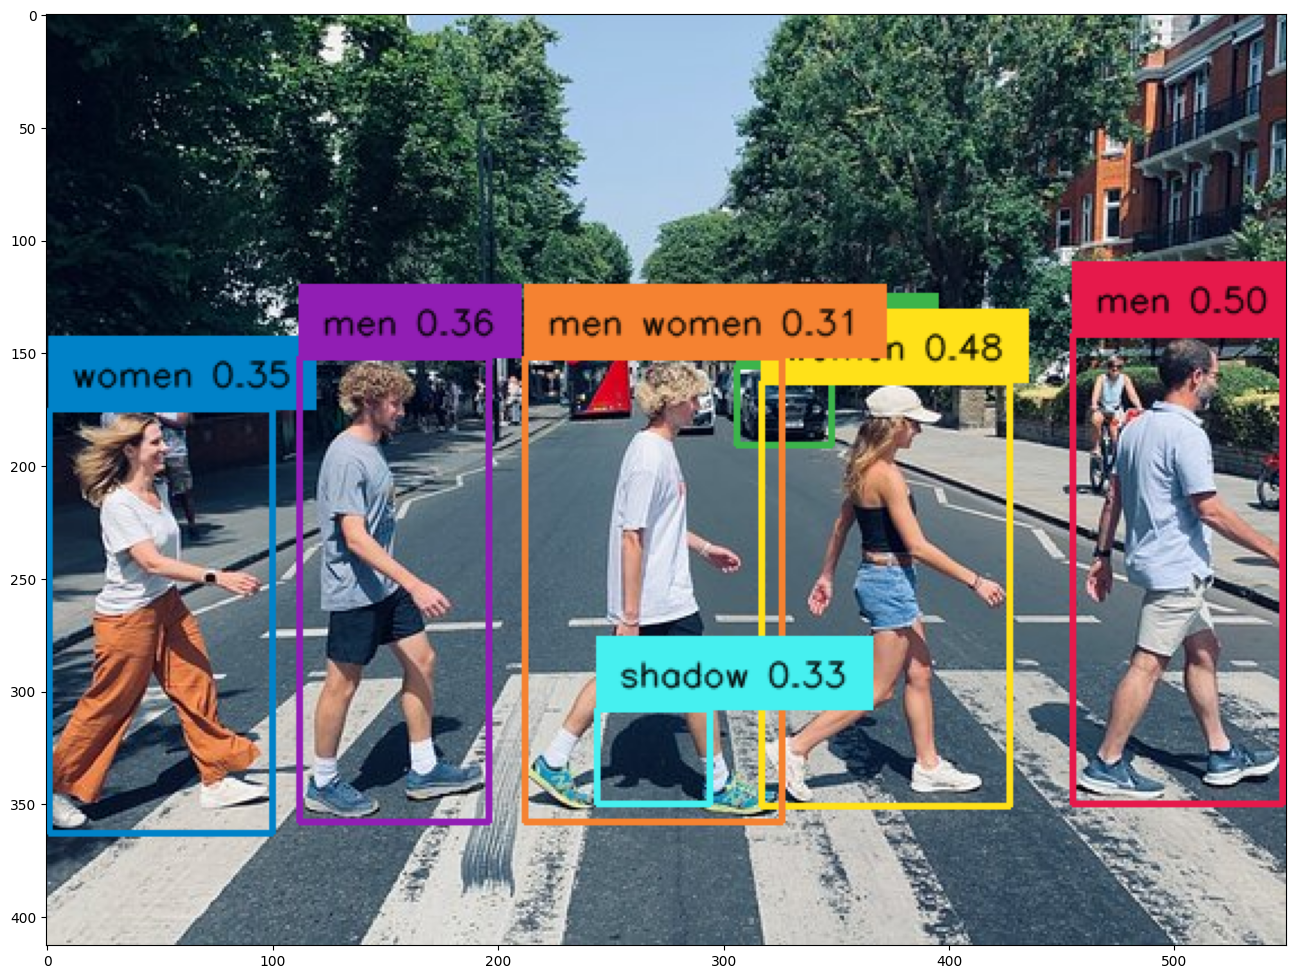

In [10]:
# 1. Using image URL
import cv2
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import supervision as sv

image_url = "https://media-cdn.tripadvisor.com/media/photo-s/28/d3/3f/a2/abbey-road-crossing.jpg"

response = requests.get(image_url)
response.raise_for_status()

image_bytes = np.frombuffer(response.content, np.uint8)
image = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)

CLASSES = ['men', 'women', 'shadow',  'car', 'cross walk']
BOX_TRESHOLD = 0.25
TEXT_TRESHOLD = 0.25

# image = cv2.imread(SOURCE_IMAGE_PATH)
caption = ", ".join(CLASSES)

detections, labels = model.predict_with_caption(
    image=image,
    caption=caption,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

box_annotator = sv.BoxAnnotator()
labels = [
    f"{label} {confidence:0.2f}"
    for label, (_, confidence, class_id, _)
    in zip(labels, detections)]
annotated_frame = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))